In [1]:
using LinearAlgebra, Printf, Plots#, Interact
Base.show(io::IO, f::Float64) = @printf(io, "% 12.5f", f)

In [2]:
function run( Ã, b̃, x, N; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, N)
    for i = 1:N
        x_old    = x
        x        = Ã*x_old + b̃
        error[i] = norm(x - x_old)
        if show; print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    println()
    x,error
end

function run_sor( Ã, b̃, x, N, α; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, N)
    for i = 1:N
        x_old    = x
        x_star   = Ã*x_old + b̃
        x        = x_old + α * (x_star - x_old )
        error[i] = norm(x - x_old)
        
        if show;  print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    if show; println(); end
    x,error
end

run_sor (generic function with 1 method)

# 1. Jacobi Method

In [3]:
A = [ 6. 2 -3; -1 3 1; 1 2 4]; b = [1;1;1]
Int64.(A)

3×3 Array{Int64,2}:
  6  2  -3
 -1  3   1
  1  2   4

---
Let $A = S - T, $ where $S$ in chosen to be invertible

Then $A x = b \Leftrightarrow S x = T x + b \Leftrightarrow x = S^{-1} T x + S^{-1} b$

In [23]:
S = diagm(diag((A)))
println("S = "); Base.print_matrix(stdout, Int64.(S)); println()
T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("12 Ã ="); Base.print_matrix( stdout, Int64.(12*Ã) ); println("\n")
println("12 b̃ = $(Int64.(12b̃))" )

S = 
 6  0  0
 0  3  0
 0  0  4
12 Ã =
  0  -4   6
  4   0  -4
 -3  -6   0

12 b̃ = [2, 4, 3]


In [15]:
println("S-T =")
Int64.(S-T)

S-T =


3×3 Array{Int64,2}:
  6  2  -3
 -1  3   1
  1  2   4


****** Spectral Radius:      0.50670 

[     0.16667,      0.33333,      0.25000]        0.44876
[     0.18056,      0.30556,      0.04167]        0.21064
[     0.08565,      0.37963,      0.05208]        0.12084
[     0.06617,      0.34452,      0.03877]        0.04230
[     0.07121,      0.34246,      0.06120]        0.02308
[     0.08311,      0.33667,      0.06096]        0.01324
[     0.08493,      0.34072,      0.06089]        0.00443
[     0.08354,      0.34135,      0.05841]        0.00291
[     0.08209,      0.34171,      0.05844]        0.00149
[     0.08198,      0.34122,      0.05862]        0.00054
[     0.08224,      0.34112,      0.05890]        0.00039
[     0.08241,      0.34111,      0.05888]        0.00017
[     0.08240,      0.34118,      0.05884]        0.00007
[     0.08236,      0.34119,      0.05881]        0.00005
[     0.08234,      0.34118,      0.05882]        0.00002
[     0.08235,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34117,    

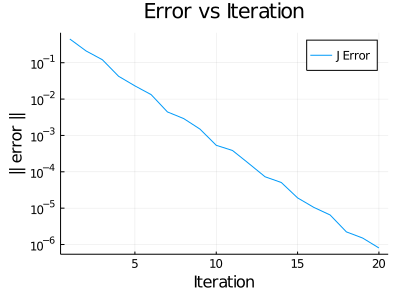

In [24]:
x = [0;0;0]
N = 20

xN, J_error = run( Ã, b̃, x, N)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 
plot(J_error, label="J Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

-----
System Need not converge!


****** Spectral Radius:      5.44949 

[     3.00000,      1.00000]        3.16228
[     8.00000,      9.00000]        9.43398
[    29.00000,     54.00000]       49.65884
[   140.00000,    300.00000]      269.88331
[   743.00000,   1641.00000]     1470.33670
[  4028.00000,   8949.00000]     8012.37100
[ 21929.00000,  48774.00000]    43663.21594
[ 119480.00000,  265800.00000]    237942.18263
[ 651083.00000,  1448481.00000]    1296663.44800
[ 3548048.00000,  7893489.00000]    7066154.14007



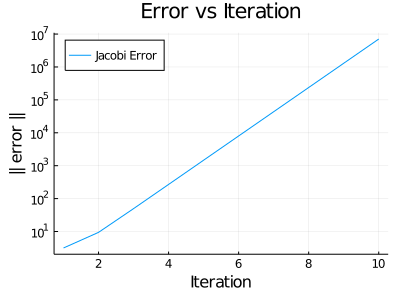

In [17]:
x,e = run([1 2; 1 5], [3;1], [0;0], 10)
plot(e, label="Jacobi Error" )
plot!(legend=:topleft, yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 2. Gauss Seidel

In [18]:
S = LowerTriangular(A)

T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("Ã ="); Base.print_matrix( stdout, Ã ); println("\n")
println("b̃ = $(b̃)" )

Ã =
      0.00000      -0.33333       0.50000
      0.00000      -0.11111      -0.16667
      0.00000       0.13889      -0.04167

b̃ = [     0.16667,      0.38889,      0.01389]



****** Spectral Radius:      0.16667 

[     0.16667,      0.38889,      0.01389]        0.42333
[     0.04398,      0.34336,      0.06732]        0.14135
[     0.08587,      0.33952,      0.05877]        0.04293
[     0.08288,      0.34137,      0.05860]        0.00352
[     0.08217,      0.34119,      0.05886]        0.00077
[     0.08237,      0.34117,      0.05882]        0.00020
[     0.08236,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xN - b || =      0.00000



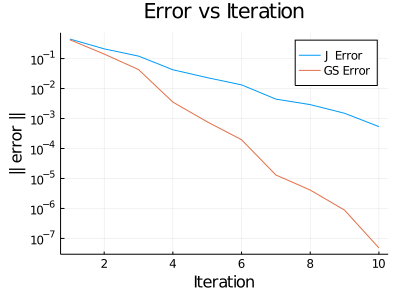

In [19]:
x = [0;0;0]
N = 10

xN,GS_error = run( Ã, b̃, x, N)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 

plot( J_error, label="J  Error")
plot!(GS_error, label="GS Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 3. Successive Overrelaxation (SOR)

In [20]:
S = LowerTriangular(A)
println( "S = "); Base.print_matrix( stdout, S ); println("\n")

T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("Ã ="); Base.print_matrix( stdout, Ã ); println("\n")
println("b̃ = $(b̃)" )

S = 
      6.00000       ⋅             ⋅      
     -1.00000       3.00000       ⋅      
      1.00000       2.00000       4.00000

Ã =
      0.00000      -0.33333       0.50000
      0.00000      -0.11111      -0.16667
      0.00000       0.13889      -0.04167

b̃ = [     0.16667,      0.38889,      0.01389]



****** Spectral Radius:      0.16667 

[     0.15000,      0.35000,      0.01250]        0.38099
[     0.06562,      0.34812,      0.05703]        0.09542
[     0.07779,      0.34145,      0.05958]        0.01411
[     0.08216,      0.34106,      0.05890]        0.00444
[     0.08240,      0.34116,      0.05881]        0.00028
[     0.08236,      0.34118,      0.05882]        0.00005
[     0.08235,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xN - b || =      0.00000



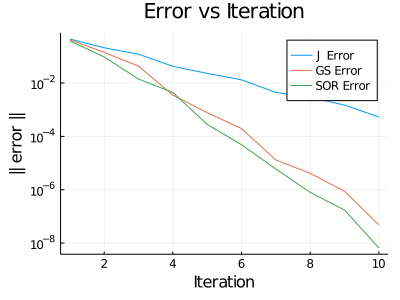

In [21]:
x = [0;0;0]
N = 10

xN,SOR_error = run_sor( Ã, b̃, x, N, 0.9)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 

plot( J_error,   label="J  Error")
plot!(GS_error,  label="GS Error" )
plot!(SOR_error, label="SOR Error" )

plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

In [22]:
using Interact
@manipulate for α in range(0.01, stop=2, length = 21)
    xN,SOR_error = run_sor( Ã, b̃, x, N, α; show=false)
    plot( J_error,   label="J  Error")
    plot!(GS_error,  label="GS Error" )
    plot!(SOR_error, label="SOR Error" )

    plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8537089995619499411\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-361568282286848599\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8537089995619499411\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 21,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\lab\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\lab\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\lab\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\lab\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\lab\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000017d3bc70, Task (runnable) @0x0000000017d3bc70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"     0.01000\",\"     0.10950\",\"     0.20900\",\"     0.30850\",\"     0.40800\",\"     0.50750\",\"     0.60700\",\"     0.70650\",\"     0.80600\",\"     0.90550\",\"     1.00500\",\"     1.1045